In [1]:
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def bino(n, k):
    def eratosthenes_simple_numbers(N):
        yield 2
        nonsimp = set()
        for i in xrange(3, N + 1, 2):
            if i not in nonsimp:
                nonsimp |= {j for j in xrange(i * i, N + 1, 2 * i)}
                yield i
    def calc_pow_in_factorial(a, p):
        res = 0
        while a:
            a //= p
            res += a
        return res
    ans = 1
    for p in eratosthenes_simple_numbers(n):
        ans *= p ** (calc_pow_in_factorial(n, p) - calc_pow_in_factorial(k, p) - calc_pow_in_factorial(n - k, p))
    return ans

In [3]:
def f1(n): #Pdiamond
    x=0
    for j in range(n+1):
        xx = (bino(n,j))**2 *(bino(2*j,j))*(bino(2*n-2*j,n-j))
        x+=xx
    return x

def f2(n): #Pfcc
    y=0
    for j in range(n+1):
        yy = bino(n,j)*((-4)**(n-j)) *f1(j)
        y+=yy
    return float(y)/12**n

def F(n): #FPfcc
    y = [1]
    if n==0: return y[0]
    else:  
        m = 1
        while m<=n:
            yy=0
            for i in range(m-1):
                j=i+1
                yy+=f2(m-j)*y[j]
            y.append(f2(m)-yy)    
            m+=1
    return y

In [94]:
#return at step n for j times
def Fj(n,j):
    y = F(n)
    y[0]=0 #Fj in row j-1
    k=list(y)
    Fnj=[y[-1]]
    jj = 2
    while jj<=j:
        nlist = []
        for nn in range(n+1): #get Fjj for all n 
            g=0
            for i in range(nn): #get Fjj for nn
                i+=1
                g+= y[i]*k[nn-i]
            nlist.append(g)
        jj+=1
        k=list(nlist)
        Fnj.append(k[-1])
    return Fnj #Fn at j=0 to input J
       
print Fj(4,1)
print Fj(4,2)
print Fj(5,3)

[0.019097222222222224]
[0.019097222222222224, 0.006944444444444444]
[0.012731481481481483, 0.004629629629629629, 0.0]


In [105]:
def Hn2(p,n): #prob of first succesful return after step n starting from origin
    sm = 0
    F=Fj(n,n/2)
    for j in range(n/2):
        j+=1
        sm+=F[j-1]*(1-p)**(j-1)
    return p*sm

def Hn(p,n): #prob of first succesful return after step n starting from origin
    sm = 0
    m=n+1
    for j in range(n):
        sm+=(1-p)**j*Fj(m+j,1+j)[-1]
    return sm*p


In [120]:
rv = 0.005
D = 1
kfac = 0.01
kD = 4*np.pi*(2*rv)*D
ka = kD*kfac
alpha = ka/(6*np.sqrt(2)*D*rv)
prob = [Hn(alpha,step) for step in range(11)] #step counted from origin

In [121]:
print sum(prob)
print prob
#print (alpha/12)*(1+(5-alpha)/12)
#print (alpha/12)*((5-alpha)/12)
#print alpha*((Fj(3,1)[-1])+(1-alpha)*Fj(4,2)[-1])

0.00626566790519
[0.0, 0.0024682682989768698, 0.0010223527761779616, 0.00071484966775555347, 0.00050820135683002994, 0.00039453120762383148, 0.00031638217732570396, 0.00026199185113487655, 0.00022162833265684277, 0.00019083402992214074, 0.00016662820678372035]


In [40]:
0.05971515- 8.4220160888e-05


0.059630929839112

In [70]:
import os
def loadata(fname):
    namelist = os.listdir(fname)
    norun = len(namelist)
    print norun
    ret = np.array([])
    for name in namelist:
        dat = np.loadtxt(fname+name,delimiter=',')   
        ret =  np.r_[ret,dat]
    return ret,norun

def gethist2(fname): #to get rxn fraction for each discrete t
    ret,norun = loadata(fname)
    uq,uqcnt = np.unique(ret,return_counts=True)
    freq = [float(i)/10000/norun for i in uqcnt]
    #for i,j in zip(uq,uqcnt): print i,j
    #plt.loglog(freq,'.')
    return freq
    
freq1 = gethist2("data/fpt_01kD_L1_short/")    
freq2 = gethist2("data/fpt_001kD_L1_short/")    

400
900


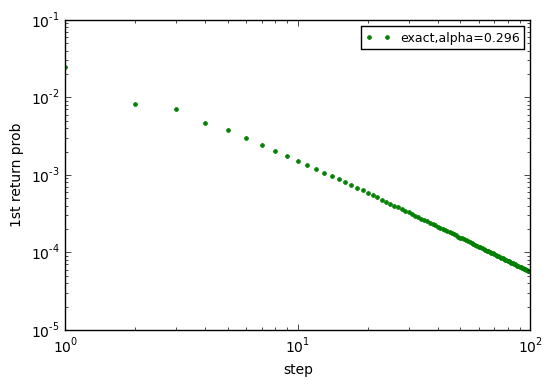

In [13]:
plt.loglog(range(len(prob)),prob,'g.',label='exact,alpha=0.296')
#plt.loglog(np.linspace(1,len(freq1),len(freq1)),freq1,'rx',label='sim,alpha=0.296')

#plt.loglog(range(len(prob2)),prob2,'r.',label='exact,alpha=0.03')
#plt.loglog(np.linspace(1,len(freq2),len(freq2)),freq2,'gx',label='sim,alpha=0.0296')

#z = lambda x: 0.1*(x**-1.5) #t^(-0.5)
#plt.plot(np.logspace(0,2,10),z(np.logspace(0,2,10)),label='p ~ t^-1.5')
plt.xlabel('step')
plt.ylabel('1st return prob')
plt.legend(fontsize=9)               

In [66]:
np.linspace(2,10+1,10)

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.])